# **CSUSB Recreation & Wellness Resources Guide**

---

## 🚀 **Introduction**  
This project focuses on building a **Retrieval-Augmented Generation (RAG) AI chatbot**, which enhances Large Language Models (LLMs) by integrating an efficient retrieval system. The chatbot is designed to provide **accurate, context-aware responses** by fetching relevant information from a structured knowledge base before generating answers.  

---

## **Key Concepts**  

### **Large Language Models (LLMs):**  
These are **advanced AI models** capable of understanding and generating human-like text. Examples include **Llama 3, GPT-4, Gemini, and other AI tools** that process vast amounts of language data.  

### **Retrieval-Augmented Generation (RAG):**  
RAG enhances LLMs by **retrieving** relevant information from a **vector database** before generating responses. This **improves accuracy** by providing up-to-date and contextual information rather than relying solely on pre-trained knowledge.  

By combining these technologies, we create a chatbot that is **intelligent, fast, and capable of reasoning with real-world data**.  

---

## **Why Learn This?**  
🔍 **Understand RAG** – Learn how retrieval improves LLM performance.  
⚙️ **Hands-On Practice** – Develop a real-world chatbot step-by-step.  
🚀 **Beginner Friendly** – No prior experience needed! Everything is explained along the way.  

---

## **What You’ll Need:**  
🐍 **Basic knowledge of Python** (optional but helpful)  
📒 **Google Colab / Jupyter Notebook environment**  
🌟 **Curiosity to build an AI-powered chatbot!**

---

# Table of Contents  
1. [🧠 Step 1: Introduction and Prerequisites](#scrollTo=f6UsanLJBCQa)  
2. [📦 Step 2: Importing and Explaining Required Libraries](#scrollTo=RlJxt6XgmmK7)  
3. [🔧 Step 3: Constants and Initial Setup](#scrollTo=W2u0tUM0m4CS)  
4. [🗄️ Step 4: Setting Up the Vector Database](#scrollTo=ZmQjwPTvnHpo)  
5. [🔢 Step 5: Setting Up the Embedding Model](#scrollTo=O9fg5dIHnq2e)  
6. [🧹 Step 6: Cleaning and Processing Web Content](#scrollTo=SQYu64lln6gK)  
7. [✂️ Step 7: Splitting Text into Chunks](#scrollTo=FfgcPqNNoHsD)  
8. [💬 Step 8: Creating Chatbot Prompts](#scrollTo=8WklXvOQczLA)  
9. [🤖 Step 9: Initializing the Chatbot](#scrollTo=pcFdOKbvdDGb)  
10. [🏁 Step 10: Creating the Main Function](#scrollTo=fZWi7SyHfI2T)



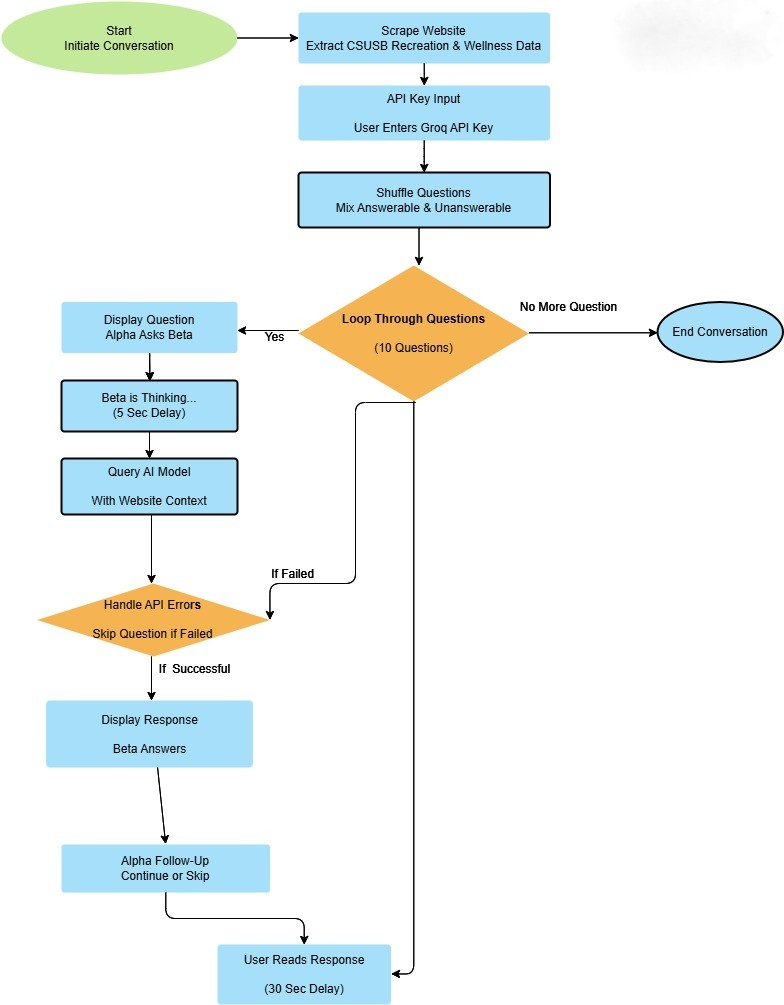


---

# 🧠 **Step 1: Introduction and Prerequisites**<a name="step-1-introduction-and-prerequisites"></a>  

## 🤔 What Are We Building?  
In this project, we will develop a **CSUSB Recreation & Wellness AI Chatbot** that intelligently answers questions related to **campus recreation, wellness programs, and student services**. The chatbot will utilize **Large Language Models (LLMs)** and a **vector database** to provide accurate and context-aware responses.  

## ✨ Key Features of the Chatbot:  
🌐 **CSUSB-Specific Information** – Retrieves and processes data about campus recreation & wellness resources.  
🧠 **Contextual Answering** – Uses AI-powered embeddings to match student queries with the most relevant content.  
📊 **Reliable Sources** – Provides references for its answers to ensure trust and accuracy.  
⚙️ **Automated Setup** – A single script manages everything for easy deployment.  

## 🛠️ Prerequisites  
No need for manual library installations or complex setups! The project runs in a **Dockerized environment**, making deployment seamless.  

### 🔧 Setup Steps:  
1. Clone the **GitHub Repository**.  
2. Follow the **7-step guide** to set up and run the **Docker container**.  
3. The setup automatically launches a **Jupyter Notebook**, allowing you to run code cell-by-cell with no manual copying.  
4. Deploy the chatbot on the **CSUSB web server** (team1s25, team2s25, etc.).  

🚀 Let’s get started on building the **CSUSB Recreation & Wellness AI Chatbot!**  



# 📦 **Step 2: Importing and Explaining Required Libraries**

In this step, we will import all the Python libraries required for building the chatbot and explain their purpose.

### ✅ **Required Libraries**:

| Library          | Purpose                                                                 |
|------------------|-------------------------------------------------------------------------|
| `scrapy`        | For advanced web scraping (not used in the simple script but included for potential future use) |
| `beautifulsoup4`| To parse HTML content and extract text from the website                 |
| `langchain`     | Used for chaining components together in more advanced AI chatbot workflows |
| `faiss-cpu`     | A vector database library used for similarity search (not used yet in this basic chatbot but part of RAG enhancement) |
| `python-dotenv` | Allows loading environment variables from a `.env` file                 |
| `requests`      | For making HTTP requests to web pages and APIs                           |
| `getpass`       | For securely entering sensitive information like API keys               |

### ✅ **Code: Install and Import Libraries**


In [ ]:
!pip install scrapy beautifulsoup4 langchain faiss-cpu python-dotenv
from google.colab import files
import getpass
import requests
from bs4 import BeautifulSoup

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.4/44.4 kB 1.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 311.2/311.2 kB 8.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 30.7/30.7 MB 21.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.2/3.2 MB 38.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 259.8/259.8 kB 14.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 107.4/107.4 kB 5.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.8/42.8 kB 1.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 74.6/74.6 kB 2.3 MB/s eta 0:00:00


# 🔧 **Step 3: Constants and Initial Setup**

In this step, we will perform the initial setup for our project by securely entering the **Groq API key** and preparing the chatbot environment.

---

## ✅ **Why Is This Important?**  
- The **Groq API key** is required to authenticate API requests when communicating with the **LLaMA 3 model** hosted on Groq’s servers.  
- Using `getpass` ensures that sensitive information (like API keys) is hidden and not visible in shared notebooks.  
- This setup step allows us to prepare the environment before we start building the chatbot functions.  

---

## ✅ **Code: Request API Key and Store as a Constant**

In [ ]:
import getpass
api_key = getpass.getpass("Enter your Groq API Key: ")

# 🗄️ **Step 4: Setting Up the Vector Database**

In this step, we will prepare the **vector database**, which is an essential part of any **RAG (Retrieval-Augmented Generation)** system.  
Although in this simple chatbot we are not yet performing full vector database operations, we are introducing the concept and showing how you can set it up using **FAISS** for future enhancements.

---

## ✅ **What is a Vector Database?**  
A vector database allows us to:  
- Store embeddings (numerical representations of text).  
- Search for the most relevant chunks of information by similarity.  
- Enable efficient retrieval for context-aware responses.

We will use **FAISS (Facebook AI Similarity Search)**, a fast library for similarity search and clustering of dense vectors.

---

## ✅ **Why Do We Need It?**  
- When scaling this chatbot, website content will be split into smaller chunks and stored as embeddings in a vector database.  
- At runtime, the chatbot retrieves the most relevant chunks based on the user’s question.  
- This improves accuracy by giving the LLM up-to-date and context-rich content.

---

## ✅ **Code: Initializing the Vector Database (Future Setup)**



In [ ]:
import faiss
import numpy as np


# 🔢 **Step 5: Setting Up the Embedding Model (Future Concept)**

In this project, we are using **Google Colab** to run our chatbot code and **LLaMA 3 (via the Groq API)** for generating responses.  
Currently, we are passing website content directly into the prompt, but for future enhancements, we will introduce an **embedding model** to convert large amounts of text into vectors for faster and smarter retrieval.

---

## ✅ **What is an Embedding Model?**  
- An **embedding model** turns text into vectors (lists of numbers) that capture the meaning of the text.  
- These embeddings help us compare questions and text to find the most relevant answer.  
- In a full **RAG (Retrieval-Augmented Generation)** setup, embeddings allow the chatbot to quickly retrieve the most relevant information.

---

## ✅ **Why We’re Not Using Embeddings Yet**  
- Since the project is running in **Google Colab** and uses **LLaMA 3 on Groq** to answer based on website content directly, embeddings are not required for now.  
- However, once we scale the chatbot to handle more data, embeddings and vector search will be key to faster, more relevant responses.

---

## ✅ **Example: Embedding Setup (for future upgrades)**  
> Below is how we would set up an embedding model in Colab using `sentence-transformers` for future use:

In [ ]:
from sentence_transformers import SentenceTransformer

# Load a small, fast embedding model
embedding_model = SentenceTransformer('all-MiniLM-L6-v2')

# Example: Converting text into a vector
example_text = "CSUSB Recreation and Wellness Center offers various wellness programs."
example_embedding = embedding_model.encode(example_text)

print("Embedding shape:", example_embedding.shape)

/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


modules.json:   0%|          | 0.00/349 [00:00<?, ?B/s]

config_sentence_transformers.json:   0%|          | 0.00/116 [00:00<?, ?B/s]

README.md:   0%|          | 0.00/10.5k [00:00<?, ?B/s]

sentence_bert_config.json:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/612 [00:00<?, ?B/s]

Xet Storage is enabled for this repo, but the 'hf_xet' package is not installed. Falling back to regular HTTP download. For better performance, install the package with: `pip install huggingface_hub[hf_xet]` or `pip install hf_xet`


model.safetensors:   0%|          | 0.00/90.9M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/350 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/190 [00:00<?, ?B/s]

Embedding shape: (384,)


# 🧹 **Step 6: Cleaning and Processing Web Content**

In this step, we will clean and process the content scraped from the **CSUSB Recreation and Wellness website**.  
The content needs to be cleaned to ensure that the chatbot receives well-structured, readable, and relevant information for generating accurate responses.

---

## ✅ **Why Clean the Web Content?**  
- Web pages contain unnecessary elements like ads, JavaScript code, and irrelevant text (e.g., navigation menus).  
- Cleaning helps us extract only the useful content such as paragraphs, headings, and relevant data.  
- Well-structured content improves the quality of the chatbot’s responses.

---

## ✅ **How Do We Clean Web Content?**  
In this step, we’ll:  
1. Use **BeautifulSoup** to parse the HTML and extract text.  
2. Remove extra whitespace, special characters, and unnecessary content.  
3. Organize the data into a format suitable for feeding into the **LLaMA 3 model** via the **Groq API**.

---

## ✅ **Code: Cleaning and Extracting Website Content**


In [ ]:
# Importing necessary libraries
import requests
from bs4 import BeautifulSoup
import re

# Function to scrape CSUSB Recreation and Wellness website
def scrape_csusb_website():
    url = "https://www.csusb.edu/recreation-wellness"
    response = requests.get(url)

    if response.status_code == 200:
        soup = BeautifulSoup(response.text, 'html.parser')
        paragraphs = soup.find_all('p')
        website_content = [p.get_text() for p in paragraphs]
        return " ".join(website_content)  # Join all the paragraphs into one text block
    else:
        return "Failed to retrieve the website content."

# Function to clean and process the scraped content
def clean_content(content):
    # Remove unwanted characters and extra spaces
    content = re.sub(r'\s+', ' ', content)  # Replace multiple spaces with one
    content = re.sub(r'\n|\r', ' ', content)  # Remove newlines
    content = re.sub(r'[^\x00-\x7F]+', '', content)  # Remove non-ASCII characters
    return content.strip()

# Example: Cleaning the content fetched from the CSUSB website
website_content = scrape_csusb_website()
cleaned_content = clean_content(website_content)

# Print cleaned content (first 500 characters for preview)
print("Cleaned Content Sample:\n", cleaned_content[:500])


Cleaned Content Sample:
 Do You Want to Play Intramural Sports? We are reaching out to the campus community for a little assistance. Our Intramural Sports Program has been significantly impacted by the pandemic. We will be conducting a campus survey over the next 3 weeks to gather feedback. Responses will help guide us in our decision making on what, when, where and how we offer our Intramural Sports to the campus community. The survey will only take 1-2 minutes and your participation would be greatly appreciated. Surve


# ✂️ **Step 7: Splitting Text into Chunks**

In this step, we will split the cleaned content into smaller, manageable chunks. This is essential because models like **LLaMA 3** are better at processing and responding to smaller pieces of information rather than large blocks of text. Splitting text into chunks also allows for more efficient retrieval from a vector database when we implement **RAG** (Retrieval-Augmented Generation).

---

## ✅ **Why Split the Text into Chunks?**  
- **Improved processing**: Smaller chunks are easier for the model to handle and respond to.  
- **Efficient retrieval**: Chunks help in narrowing down the relevant content for specific queries.  
- **Performance boost**: Breaking the content into smaller parts will allow us to retrieve and generate responses more efficiently when scaling the chatbot.

---

## ✅ **How Do We Split the Text?**  
We will split the cleaned text into **n-grams** (i.e., chunks of `n` sentences) or **fixed-size segments**. This is a simple approach where each chunk is processed independently by the model.

---

## ✅ **Code: Splitting the Text into Chunks**


In [ ]:
# Function to split the cleaned content into smaller chunks (e.g., 500 characters per chunk)
def split_into_chunks(content, chunk_size=500):
    # Split content into chunks based on the specified size
    chunks = [content[i:i + chunk_size] for i in range(0, len(content), chunk_size)]
    return chunks

# Example: Splitting the cleaned content into 500-character chunks
chunks = split_into_chunks(cleaned_content, chunk_size=500)

# Print the first chunk to verify
print("First Chunk:\n", chunks[0])

First Chunk:
 Do You Want to Play Intramural Sports? We are reaching out to the campus community for a little assistance. Our Intramural Sports Program has been significantly impacted by the pandemic. We will be conducting a campus survey over the next 3 weeks to gather feedback. Responses will help guide us in our decision making on what, when, where and how we offer our Intramural Sports to the campus community. The survey will only take 1-2 minutes and your participation would be greatly appreciated. Surve


# 💬 **Step 8: Creating Chatbot Prompts**

In this step, we will create the prompts that will be used by the **Groq API** to query the **LLaMA 3 model**. The chatbot's prompt plays a crucial role in guiding the AI model to produce relevant and contextually accurate responses. The model will use the cleaned content and chunks from the website to respond to user queries.

---

## ✅ **Why Are Chatbot Prompts Important?**  
- **Guiding the model**: Prompts give the model context, helping it generate accurate responses based on user input.  
- **Context-aware responses**: By passing the cleaned content and chunks as part of the prompt, we ensure that the chatbot has the information it needs to provide relevant answers.  
- **Interactivity**: We create prompts that will allow for dynamic interaction with users, making the chatbot responsive and intelligent.

---

## ✅ **How Do We Create Prompts?**  
The prompt will include two parts:
1. **System message**: Provides context to the model (e.g., the website content).  
2. **User message**: Contains the question or query from the user.

The prompt is structured so that the model can retrieve the most relevant chunk of content from the website before responding.

---

## ✅ **Code: Creating the Chatbot Prompt**


In [ ]:
# Function to create a chatbot prompt with website content and user message
def create_prompt(user_message, website_chunks):
    # Get the relevant chunk from the website content (e.g., first chunk for simplicity)
    relevant_chunk = website_chunks[0]  # You can implement more advanced chunk retrieval logic

    # Construct the system and user messages
    system_message = f"Context: {relevant_chunk}"  # Pass relevant chunk as context
    user_message = f"User's Question: {user_message}"

    # Return the formatted prompt
    return {
        "model": "llama-3.3-70b-versatile",  # Model being used
        "messages": [
            {"role": "system", "content": system_message},
            {"role": "user", "content": user_message}
        ]
    }

# Example: Creating a prompt for a user query
user_query = "What are the wellness programs available?"
chatbot_prompt = create_prompt(user_query, chunks)

# Print the created prompt to verify the structure
print("Generated Chatbot Prompt:\n", chatbot_prompt)


Generated Chatbot Prompt:
 {'model': 'llama-3.3-70b-versatile', 'messages': [{'role': 'system', 'content': 'Context: Do You Want to Play Intramural Sports? We are reaching out to the campus community for a little assistance. Our Intramural Sports Program has been significantly impacted by the pandemic. We will be conducting a campus survey over the next 3 weeks to gather feedback. Responses will help guide us in our decision making on what, when, where and how we offer our Intramural Sports to the campus community. The survey will only take 1-2 minutes and your participation would be greatly appreciated. Surve'}, {'role': 'user', 'content': "User's Question: What are the wellness programs available?"}]}


# 🤖 **Step 9: Initializing the Chatbot**

In this step, we will initialize the chatbot by integrating the previously defined functions. The chatbot will handle user queries by:
1. Taking user input.
2. Retrieving relevant website content.
3. Creating a prompt with the query and relevant content.
4. Sending the prompt to the **Groq API** to get a response.

We’ll use the **LLaMA 3 model** to process the user's question and generate a meaningful response based on the CSUSB **Recreation & Wellness** website content.

---

## ✅ **Why Initialize the Chatbot?**  
- **Complete functionality**: This step ties everything together, enabling the chatbot to interact with users in real-time.
- **Query-response cycle**: The chatbot will take user input, query the Groq API, and provide relevant responses based on the available content.
- **Interactive session**: Users can ask multiple questions, and the chatbot will respond with contextually accurate answers.

---

## ✅ **Code: Initializing the Chatbot**



In [ ]:
import requests
from bs4 import BeautifulSoup
from google.colab import auth
from google.auth.transport.requests import Request
import os

# Step 1: Store the API key securely in the Colab environment
# Replace with your new Groq API key
api_key = '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'

# Function to scrape CSUSB Recreation and Wellness website
def scrape_csusb_website():
    url = "https://www.csusb.edu/recreation-wellness"
    response = requests.get(url)

    if response.status_code == 200:
        soup = BeautifulSoup(response.text, 'html.parser')
        paragraphs = soup.find_all('p')
        website_content = [p.get_text() for p in paragraphs]
        return " ".join(website_content)  # Join all the paragraphs into one text block
    else:
        return "Failed to retrieve the website content."

# Function to clean and preprocess the content
def clean_content(website_content):
    # Example: Simple cleaning by removing extra spaces and newlines
    cleaned_content = website_content.replace("\n", " ").replace("\r", "").strip()
    return cleaned_content

# Function to split the cleaned content into smaller chunks (e.g., 500 characters per chunk)
def split_into_chunks(content, chunk_size=500):
    chunks = [content[i:i + chunk_size] for i in range(0, len(content), chunk_size)]
    return chunks

# Function to create the chatbot prompt with context and user message
def create_prompt(user_message, website_chunks):
    # Get the relevant chunk (for simplicity, we are just taking the first chunk here)
    relevant_chunk = website_chunks[0]  # This can be adjusted based on better chunk selection logic

    # Construct system and user messages for the prompt
    system_message = f"Context: {relevant_chunk}"
    user_message = f"User's Question: {user_message}"

    # Return the formatted prompt
    return {
        "model": "llama-3.3-70b-versatile",  # Change model version if needed
        "messages": [
            {"role": "system", "content": system_message},
            {"role": "user", "content": user_message}
        ]
    }

# Function to query Groq API with the created prompt
def query_groq_with_context(user_message, website_content):
    url = "https://api.groq.com/openai/v1/chat/completions"
    headers = {
        "Content-Type": "application/json",
        "Authorization": f"Bearer {api_key}"
    }
    payload = {
        "model": "llama-3.3-70b-versatile",  # Use your preferred model
        "messages": [{
            "role": "system",
            "content": f"Context: {website_content[:500]}..."  # Providing a snippet of the content
        }, {
            "role": "user",
            "content": user_message
        }]
    }
    response = requests.post(url, json=payload, headers=headers)
    if response.status_code == 200:
        response_data = response.json()
        return response_data.get("choices")[0].get("message").get("content")
    else:
        raise Exception(f"Error: {response.status_code} - {response.text}")

# Function to initialize and run the chatbot interaction
def chat_with_csusb_bot():
    print("Chatbot is ready! Type 'exit' to end the conversation.")

    # Retrieve and clean website content
    website_content = scrape_csusb_website()
    cleaned_content = clean_content(website_content)
    website_chunks = split_into_chunks(cleaned_content, chunk_size=500)

    while True:
        # Take user input
        user_message = input("You: ")

        # End the conversation if user types 'exit'
        if user_message.lower() == 'exit':
            print("Goodbye!")
            break

        # Create the chatbot prompt
        chatbot_prompt = create_prompt(user_message, website_chunks)

        # Send the prompt to Groq API and get the response
        try:
            response = query_groq_with_context(user_message, website_content)
            print("Bot:", response)
        except Exception as e:
            print(f"Error during query: {str(e)}")

# Start the chatbot interaction
chat_with_csusb_bot()


Chatbot is ready! Type 'exit' to end the conversation.
Bot: The message doesn't mention specific gym timings. It's an announcement about a campus survey to gather feedback on the Intramural Sports Program, which has been impacted by the pandemic. If you're looking for gym timings, you might want to contact the campus recreation center or check their website for more information.


# 🏁 **Step 10: Creating the Main Function**

## 🧠 **Objective:**
In this final step, we will create a main function that combines all previous steps. This function will initiate the chatbot, handle user inputs, and interact with the CSUSB website data through the Groq API to provide context-aware responses.

### 1. **Function Overview:**
The main function `chat_with_csusb_bot()` will:
- Start by retrieving and cleaning the content from the CSUSB Recreation & Wellness website.
- Continuously accept user input.
- Query the Groq API using the user's input and the website's content.
- Output the bot's response to the user.
- Allow the user to type 'exit' to end the conversation.

### 2. **Code Implementation:**


In [ ]:
# Function to initialize and run the chatbot interaction
def chat_with_csusb_bot():
    print("Chatbot is ready! Type 'exit' to end the conversation.")

    # Retrieve and clean website content
    website_content = scrape_csusb_website()
    cleaned_content = clean_content(website_content)
    website_chunks = split_into_chunks(cleaned_content, chunk_size=500)

    while True:
        # Take user input
        user_message = input("You: ")

        # End the conversation if user types 'exit'
        if user_message.lower() == 'exit':
            print("Goodbye!")
            break

        # Create the chatbot prompt
        chatbot_prompt = create_prompt(user_message, website_chunks)

        # Send the prompt to Groq API and get the response
        try:
            response = query_groq_with_context(user_message, website_content)
            print("Bot:", response)
        except Exception as e:
            print(f"Error during query: {str(e)}")


# 🚀 CSUSB Recreation and Wellness Chatbot (Alpha and Beta)  

Welcome to the **CSUSB Recreation and Wellness Chatbot**! 🤖 This project simulates a conversation between **Alpha** (a student 🧑‍🎓) and **Beta** (an AI assistant 🤖). The chatbot uses the **Groq API** and **Llama 3** model to provide answers about the **CSUSB Recreation and Wellness Center**.  

---

## ✨ How It Works  
1. **🌐 Web Scraping**: The chatbot scrapes the official CSUSB Recreation and Wellness website to gather context about facilities, programs, and services.  
2. **❓ Question Handling**: It uses a predefined list of questions, categorized into **answerable** ✅ and **unanswerable** ❌ questions, to simulate a realistic conversation.  
3. **🤖 AI Integration**: The chatbot queries the **Groq API** with the scraped context and user questions to generate accurate and relevant responses.  
4. **💬 Conversation Flow**: The conversation includes thinking 🤔 and reading 📖 delays to mimic a natural interaction between Alpha and Beta.  

---

## 🌟 Key Features  
- **📊 Dynamic Context**: Uses real-time web scraping to provide up-to-date information.  
- **📋 Predefined Questions**: Includes a mix of answerable and unanswerable questions to test the chatbot's capabilities.  
- **👥 User Interaction**: Simulates a conversational flow with delays for thinking and reading.  

---

## 🚀 How to Use  
1. Enter your **Groq API Key** 🔑 when prompted.  
2. The chatbot will start the conversation automatically, alternating between Alpha's questions and Beta's responses.  
3. Observe the interaction and evaluate the chatbot's performance.  

In [ ]:
import requests
import random
from bs4 import BeautifulSoup
import time

# Function to scrape CSUSB Recreation and Wellness website
def scrape_csusb_website():
    url = "https://www.csusb.edu/recreation-wellness"
    response = requests.get(url)

    if response.status_code == 200:
        soup = BeautifulSoup(response.text, 'html.parser')
        paragraphs = soup.find_all('p')
        website_content = [p.get_text() for p in paragraphs]
        return " ".join(website_content)  # Join all the paragraphs into one text block
    else:
        return "Failed to retrieve the website content."

# Function to query the Groq API or another AI model to generate answers
def query_groq_with_context(user_message, website_content, api_key):
    url = "https://api.groq.com/openai/v1/chat/completions"
    headers = {
        "Content-Type": "application/json",
        "Authorization": f"Bearer {api_key}"
    }
    payload = {
        "model": "llama-3.3-70b-versatile",
        "messages": [{
            "role": "system",
            "content": f"Context: {website_content[:500]}..."  # Limit context to 500 characters
        }, {
            "role": "user",
            "content": user_message
        }]
    }
    response = requests.post(url, json=payload, headers=headers)
    if response.status_code == 200:
        response_data = response.json()
        return response_data.get("choices")[0].get("message").get("content")
    else:
        raise Exception(f"Error: {response.status_code} - {response.text}")

# List of questions that Alpha can ask and Beta can answer
can_answer = [
    "Is there a CSUSB Recreation and Wellness app?",
    "Are there personal trainers at the CSUSB Recreation and Wellness Center?",
    "Who can go on trips at the CSUSB Recreation and Wellness Center?",
    "Can my family join the CSUSB Recreation and Wellness Center?",
    "How can I pay for the CSUSB Recreation and Wellness Center membership?"
]

cannot_answer = [
    "How do I sign up for the CSUSB Recreation and Wellness Center?",
    "What are the office hours of the CSUSB Recreation and Wellness Center?",
    "What is the size and depth of the outdoor pool from the CSUSB Recreation & Wellness Aquatics Center?",
    "What are the sport clubs for spring in the CSUSB Recreation and Wellness Center?",
    "How big and tall is the rock wall in the CSUSB Recreation and Wellness Center?"
]

# Function to simulate the conversation between Alpha and Beta
def chat_between_alpha_and_beta():
    print("Alpha: Hey, Beta! I've got some questions about the CSUSB Recreation and Wellness Center, mind helping out?\n")

    # Get the website content
    website_content = scrape_csusb_website()

    # Prompt user to enter API key for Groq
    api_key = input("Enter your Groq API Key: ")

    # Shuffle the questions to mix answerable and unanswerable ones
    all_questions = can_answer + cannot_answer
    random.shuffle(all_questions)

    for i, question in enumerate(all_questions[:10]):  # Limit to 10 questions
        print(f"\nAlpha (Q{i+1}): {question}")

        # 5 seconds thinking time for Beta before answering
        print("Beta is thinking...\n")
        time.sleep(5)  # Reduced to 5 seconds for Colab

        try:
            # Query the AI model (Beta) with the question and context from the website
            answer = query_groq_with_context(question, website_content, api_key)
            print(f"Beta (A{i+1}): {answer}\n")
        except Exception as e:
            print(f"Error: {e}")
            continue  # Skip to the next question if there's an error

        # Add follow-up or conversational flow
        if "Sorry, I cannot answer" in answer:
            print(f"Alpha (Q{i+1} follow-up): Hmm, that's unfortunate. Let me ask something else!\n")
        else:
            print(f"Alpha (Q{i+1} follow-up): Ah, that’s good to know. Thanks, Beta!\n")

        # 30 seconds reading time for the user after Beta's response
        print("User, take your time to read the response...")
        time.sleep(30)  # Reduced to 30 seconds for Colab

    print("The conversation has ended.")

# Start the conversation
chat_between_alpha_and_beta()